# ATP Tennis Data - Player Diff Stats + One Hot Encoding (all categorical data)


In our previous [notebook](https://github.com/sv650s/sb-capstone2/blob/master/notebooks/5-atp_sklearn_classifier.ipynb), we ran SVC, KNN, and RandomForest on our dataset her player stats were diffed. Our best model was Random Forest which gave us about a 85% accuracy score with a baseline of 65% accuracy for our null hypothesis if we only used player rank to predict winner and losers.

In this notebook we will run the same models (excluding SVC since it did not do well at all) using a different dataset. This data set was created in the the following [notebook](https://github.com/sv650s/sb-capstone2/blob/master/notebooks/3-atp_basic_feature_engineering.ipynb) where we one hot encoded any categorical data that does not have any sort of ordinality - ie, tournament id, player id, surface, etc




### Results from Random Forest in previous notebook:

Random Forest Accruacy score: 0.8524918780673256

```
              precision    recall  f1-score   support

        Loss       0.82      0.90      0.86      7115
         Win       0.89      0.81      0.85      7352

    accuracy                           0.85     14467
   macro avg       0.86      0.85      0.85     14467
weighted avg       0.86      0.85      0.85     14467
```

# Summary of Results

With this dataset, we find that KNN actually out performs Random Forest with an overall accuracy score of 84.2% vs 79.4% accuracy for Random Forest using this dataset.

Previously, with the diff dataset, KNN only had an accuracy of 60% which is below our baseline of 65%



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "diff"


# update this
FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features-{DESCRIPTION}.csv'

# FEATURE_FILE = f'{DATASET_DIR}/atp_matches_1985-2019_features-diff-ohe.csv'

START_YEAR = 1998
END_YEAR = 2019

MODEL_TEMPLATE_NAME = f'{START_YEAR}-{END_YEAR}-{DESCRIPTION}.pkl'

LABEL_COL = 'p1_winner'

# random seed
RSTATE = 1
N_JOBS = 4
MAX_ITER = 100



ModelWrapper.init(description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR, 
                 model_file_format = MODEL_TEMPLATE_NAME)

In [2]:
X_train, X_test, y_train, y_test = ju.get_data(FEATURE_FILE, LABEL_COL, START_YEAR)

# Logistic Regression

In [3]:

# train our model

lr = ModelWrapper(LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
                   X_train,
                   y_train,
                   X_test,
                   y_test).fit()
y_predict_lr = lr.predict()

//anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

Model Score: 0.6938073394495413

              precision    recall  f1-score   support

        Loss       0.70      0.67      0.69      7378
         Win       0.69      0.72      0.70      7446

    accuracy                           0.69     14824
   macro avg       0.69      0.69      0.69     14824
weighted avg       0.69      0.69      0.69     14824

      Loss   Win
Loss  4941  2437
Win   2102  5344


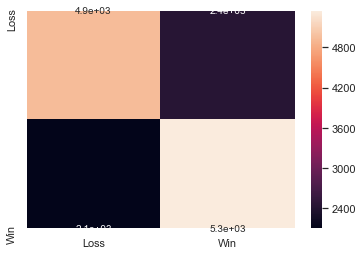

In [4]:
lr.analyze()

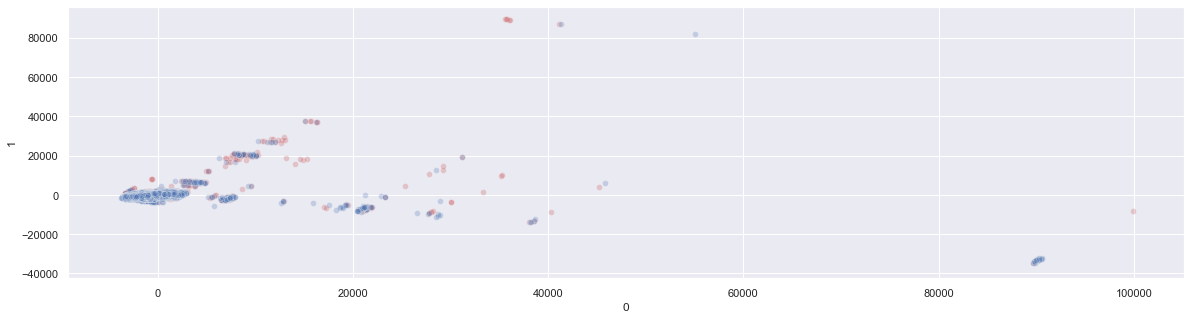

In [5]:
ju.plot_2d(X_test, y_predict_lr)

In [6]:
lr.save()

# KNN

In [7]:

# train our model

knn = ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                   X_train,
                   y_train,
                   X_test,
                   y_test).fit()
y_predict_knn = knn.predict()

Model Score: 0.6109012412304371

              precision    recall  f1-score   support

        Loss       0.61      0.61      0.61      7378
         Win       0.61      0.61      0.61      7446

    accuracy                           0.61     14824
   macro avg       0.61      0.61      0.61     14824
weighted avg       0.61      0.61      0.61     14824

      Loss   Win
Loss  4500  2878
Win   2890  4556


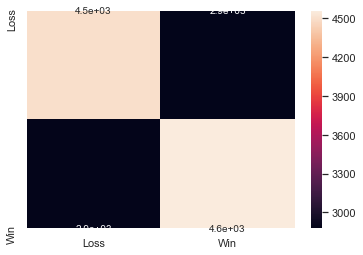

In [8]:
knn.analyze()

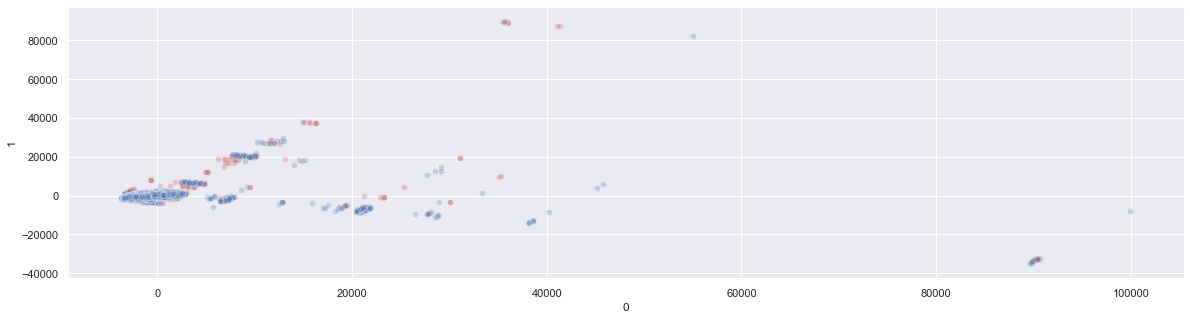

In [9]:
ju.plot_2d(X_test, y_predict_knn)

In [10]:
knn.save()

# Decision Tree

In [11]:

# train our model

dt = ModelWrapper(DecisionTreeClassifier(random_state = RSTATE),
                   X_train,
                   y_train,
                   X_test,
                   y_test).fit()
y_predict_dt = dt.predict()

Model Score: 0.9222207231516459

              precision    recall  f1-score   support

        Loss       0.92      0.92      0.92      7378
         Win       0.92      0.93      0.92      7446

    accuracy                           0.92     14824
   macro avg       0.92      0.92      0.92     14824
weighted avg       0.92      0.92      0.92     14824

      Loss   Win
Loss  6781   597
Win    556  6890


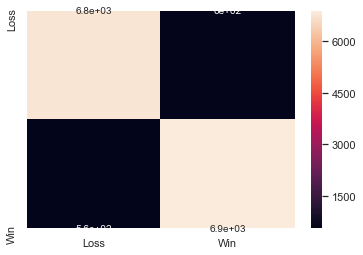

In [12]:
dt.analyze()

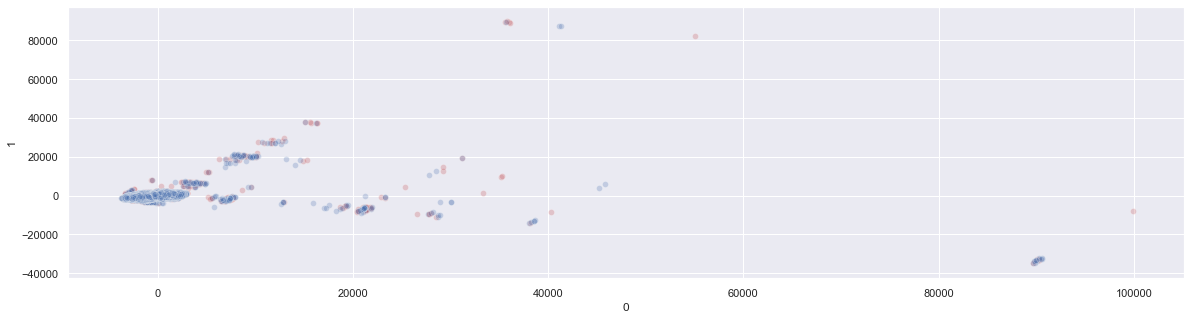

In [13]:
ju.plot_2d(X_test, y_predict_dt)

In [14]:
dt.save()

# Random Forest Classifier

In [15]:

# train our model

rf = ModelWrapper(RandomForestClassifier(random_state=RSTATE, verbose=1),
                   X_train,
                   y_train,
                   X_test,
                   y_test).fit()
y_predict_rf = rf.predict()

//anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


Model Score: 0.8621154883971938

              precision    recall  f1-score   support

        Loss       0.83      0.90      0.87      7378
         Win       0.89      0.82      0.86      7446

    accuracy                           0.86     14824
   macro avg       0.86      0.86      0.86     14824
weighted avg       0.86      0.86      0.86     14824

      Loss   Win
Loss  6658   720
Win   1324  6122


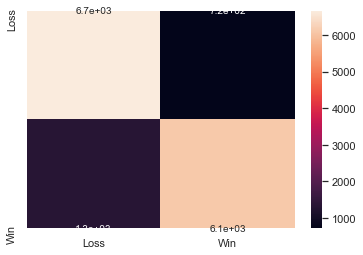

In [16]:
rf.analyze()

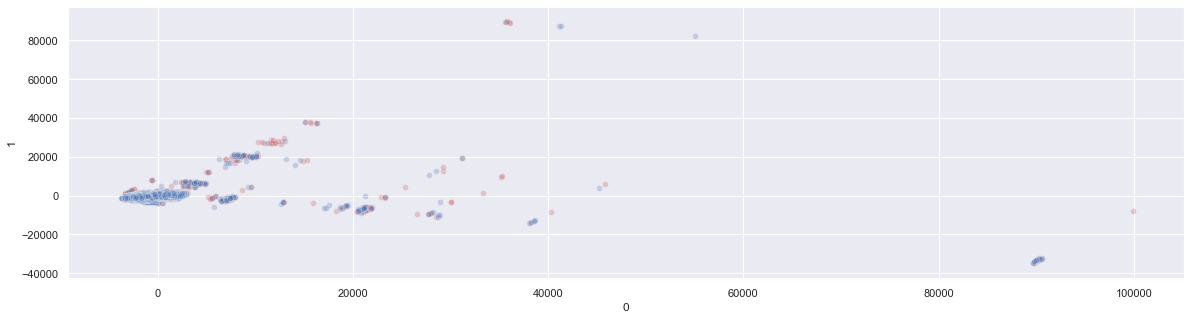

In [17]:
ju.plot_2d(X_test, y_predict_rf)

In [18]:
rf.save()

# Gradient Boosting

In [19]:

# train our model

gb = ModelWrapper(GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
                   X_train,
                   y_train,
                   X_test,
                   y_test).fit()
y_predict_gb = gb.predict()

      Iter       Train Loss   Remaining Time 
         1           1.3153            5.84s
         2           1.2572            5.89s
         3           1.2087            5.22s
         4           1.1699            4.88s
         5           1.1376            4.62s
         6           1.1111            4.59s
         7           1.0795            4.41s
         8           1.0528            4.24s
         9           1.0318            4.08s
        10           1.0104            4.00s
        20           0.8858            3.17s
        30           0.8207            2.65s
        40           0.7841            2.25s
        50           0.7560            1.81s
        60           0.7364            1.37s
        70           0.7047            1.00s
        80           0.6812            0.65s
        90           0.6546            0.32s
       100           0.6314            0.00s


Model Score: 0.8694009713977334

              precision    recall  f1-score   support

        Loss       0.85      0.89      0.87      7378
         Win       0.89      0.85      0.87      7446

    accuracy                           0.87     14824
   macro avg       0.87      0.87      0.87     14824
weighted avg       0.87      0.87      0.87     14824

      Loss   Win
Loss  6593   785
Win   1151  6295


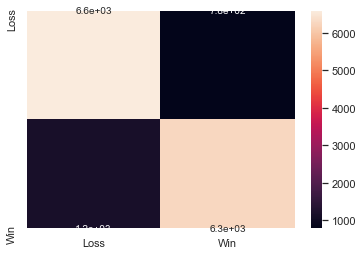

In [20]:
gb.analyze()

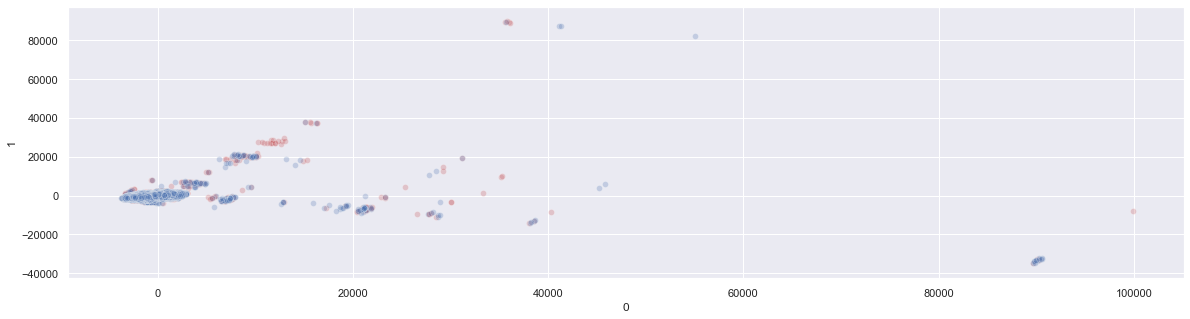

In [21]:
ju.plot_2d(X_test, y_predict_gb)

In [22]:
gb.save()

# AdaBoost

In [23]:
ab = ModelWrapper(AdaBoostClassifier(random_state=RSTATE),
                   X_train,
                   y_train,
                   X_test,
                   y_test).fit()
y_predict_ab = ab.predict()

Model Score: 0.7584997301672963

              precision    recall  f1-score   support

        Loss       0.74      0.79      0.77      7378
         Win       0.78      0.73      0.75      7446

    accuracy                           0.76     14824
   macro avg       0.76      0.76      0.76     14824
weighted avg       0.76      0.76      0.76     14824

      Loss   Win
Loss  5829  1549
Win   2031  5415


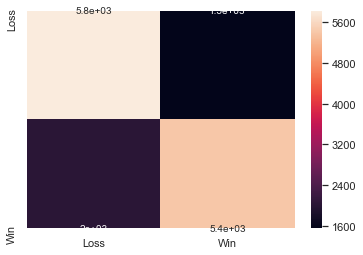

In [24]:
ab.analyze()

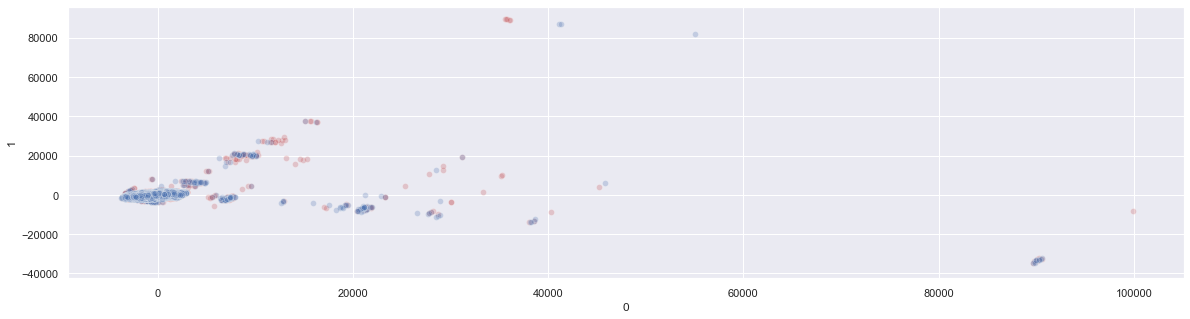

In [25]:
ju.plot_2d(X_test, y_predict_ab)

In [26]:
ab.save()

# Results

In [29]:
report = pd.read_csv(ModelWrapper.report_file)
report = report[report.description == DESCRIPTION]
report

,model,description,data_file,start_year,accuracy,confusion_matrix,classification_report,model_file
0,LogisticRegression,diff,../datasets/atp_matches_1985-2019_features-dif...,1998,0.693807,"{""0"": {""0"": 4941, ""1"": 2102}, ""1"": {""0"": 2437,...","{""Loss"": {""precision"": 0.7015476359505892, ""re...",../models/logisticregression-1998-2019-diff.pkl
1,KNeighborsClassifier,diff,../datasets/atp_matches_1985-2019_features-dif...,1998,0.610901,"{""0"": {""0"": 4500, ""1"": 2890}, ""1"": {""0"": 2878,...","{""Loss"": {""precision"": 0.6089309878213802, ""re...",../models/kneighborsclassifier-1998-2019-diff.pkl
2,DecisionTreeClassifier,diff,../datasets/atp_matches_1985-2019_features-dif...,1998,0.922221,"{""0"": {""0"": 6781, ""1"": 556}, ""1"": {""0"": 597, ""...","{""Loss"": {""precision"": 0.9242197083276543, ""re...",../models/decisiontreeclassifier-1998-2019-dif...
3,RandomForestClassifier,diff,../datasets/atp_matches_1985-2019_features-dif...,1998,0.862115,"{""0"": {""0"": 6658, ""1"": 1324}, ""1"": {""0"": 720, ...","{""Loss"": {""precision"": 0.8341267852668505, ""re...",../models/randomforestclassifier-1998-2019-dif...
4,GradientBoostingClassifier,diff,../datasets/atp_matches_1985-2019_features-dif...,1998,0.869401,"{""0"": {""0"": 6593, ""1"": 1151}, ""1"": {""0"": 785, ...","{""Loss"": {""precision"": 0.8513688016528925, ""re...",../models/gradientboostingclassifier-1998-2019...
5,AdaBoostClassifier,diff,../datasets/atp_matches_1985-2019_features-dif...,1998,0.758500,"{""0"": {""0"": 5829, ""1"": 2031}, ""1"": {""0"": 1549,...","{""Loss"": {""precision"": 0.7416030534351145, ""re...",../models/adaboostclassifier-1998-2019-diff.pkl


Text(0.5, 1.0, 'Model Accuracy - Data: diff')

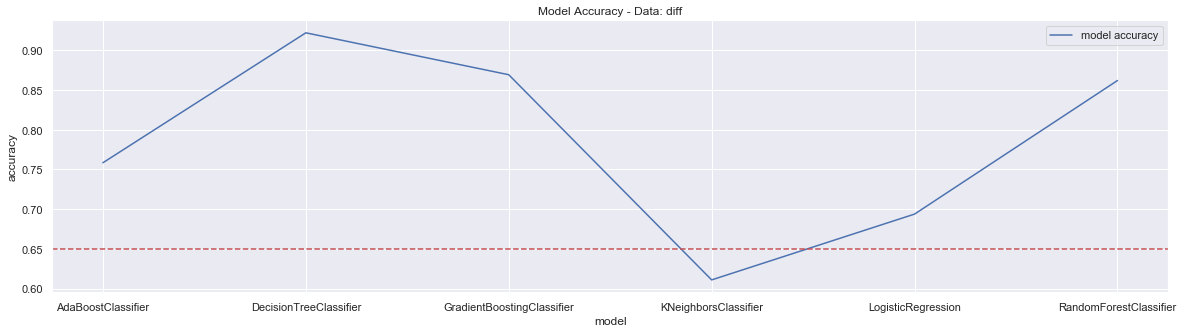

In [37]:
f, a = plt.subplots(1, 1, figsize=(20, 5))
sns.lineplot(x="model", y="accuracy", data=report, label="model accuracy")
a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy - Data: {DESCRIPTION}")